## Lennard Jones Potential

test output of Lennard Jones Potential

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import particlesim.api
from scipy import constants

* Create a System with two particles and a boxlength of ten
* Let particles approach from each side of the box in 1 dimension and calculate Lennard Jones Potential for each step

In [99]:
def particle_config(box_size = 15., charges= 0, sigma = 1.0, epsilon = 1.0, r_lim = 0.85, lennard_jones = True, coulomb = False):
    particle_1 = [0.,0,0]
    particle_2 = [box_size - r_lim,0,0]
    particle_positions = np.array([particle_1, particle_2])
    system_configuration = particlesim.api.SystemConfiguration(particle_positions,charges=charges, sigmas = sigma, epsilons = epsilon,
                                                               box_size = box_size)
    distance, pot = [], []
    while particle_positions[0][0] <= particle_positions[1][0]-r_lim:
        particle_positions[0][0] += 0.05
        r = np.linalg.norm(particle_positions[0] - particle_positions[1])
        if r > box_size/2:
            r -= box_size
        distance.append(r)
        pot.append(system_configuration.potential(xyz_trial = particle_positions,
                                                  lennard_jones=lennard_jones, coulomb = coulomb))
    distance = np.asarray(distance)
    pot = np.asarray(pot)
    mask_minus = (distance < 0)
    mask_plus = (distance>0)
    distance = np.append(distance[mask_minus][::-1],distance[mask_plus][::-1])
    pot = np.append(pot[mask_minus][::-1],pot[mask_plus][::-1])
    return distance, pot

### Parameter for Na+ and Cl-

In [100]:
sigma_na = 1.21496
epsilon_na = 0.0469
q_na = +1.0

sigma_cl = 2.02234 
epsilon_cl = 0.15
q_cl = -1.0

sigmas=[sigma_na, sigma_cl]
epsilons = [epsilon_na, epsilon_cl]
charges = [q_na, q_cl]

### Calculate Lennard Jones Potential of Na+ and Cl-

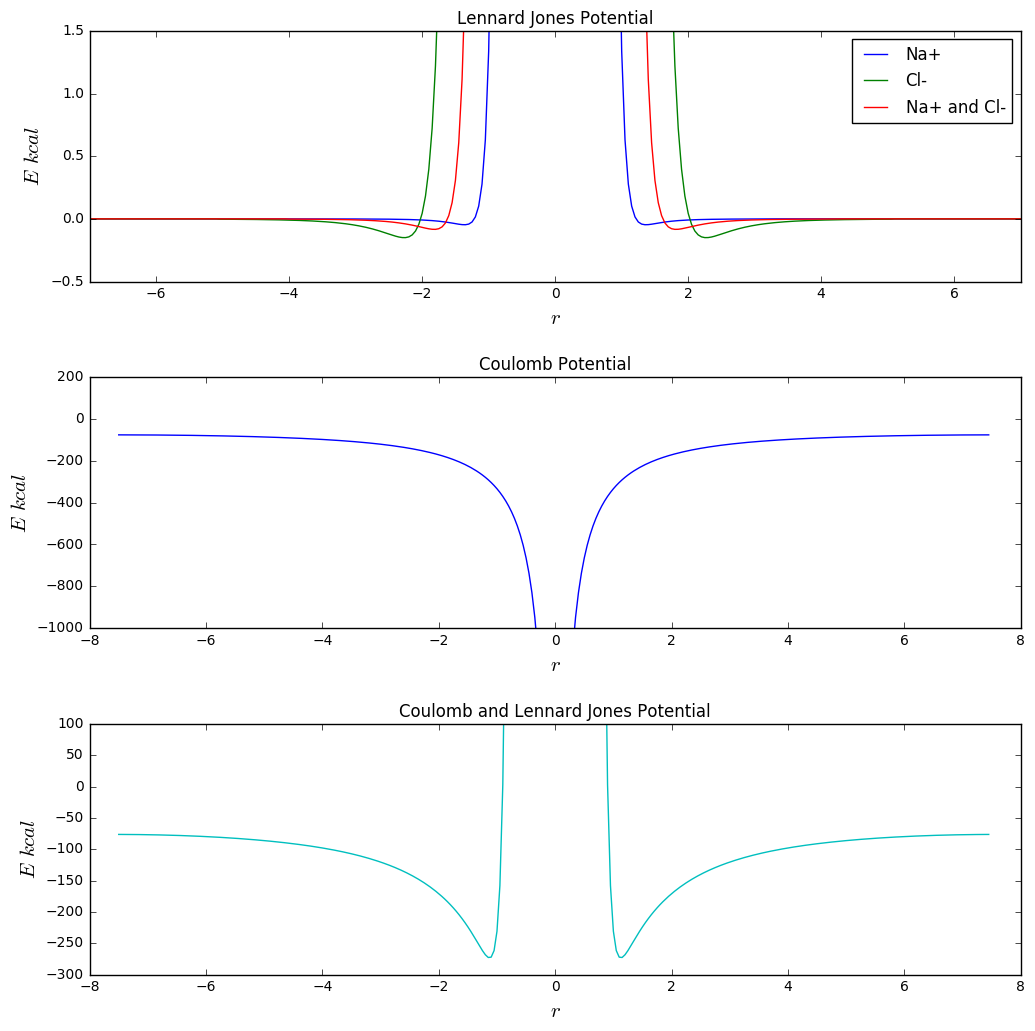

In [101]:
distance_na, pot_na = particle_config(sigma=sigma_na, epsilon=epsilon_na, lennard_jones=True, coulomb=False)
distance_cl, pot_cl = particle_config(sigma=sigma_cl, epsilon=epsilon_cl, lennard_jones=True, coulomb=False)
distance_mix, pot_mix = particle_config(sigma=sigmas,epsilon=epsilons, lennard_jones=True, coulomb=False)


distance_coulomb, pot_coulomb = particle_config(charges=charges, sigma=sigmas, epsilon=epsilons, r_lim=0.1,
                                                lennard_jones= False, coulomb=True)

distance_LJ_C, pot_LJ_C = particle_config(charges=charges, sigma=sigmas, epsilon=epsilons, r_lim=0.7,
                                                lennard_jones= True, coulomb=True)

fig, axes = plt.subplots(3,1, figsize=(10,10))
fig.tight_layout(h_pad=5)
axes[0].plot(distance_na,pot_na, label='Na+')
axes[0].plot(distance_cl,pot_cl, label='Cl-')
axes[0].plot(distance_mix,pot_mix, label='Na+ and Cl-')
axes[0].set_xlabel(r"$r$", fontsize=15)
axes[0].set_ylabel(r"$E$ $kcal$", fontsize = 15)
axes[0].set_xlim([-7,7])
axes[0].set_ylim([-0.5, 1.5])
axes[0].set_title(r"Lennard Jones Potential")
axes[0].legend()

axes[1].plot(distance_coulomb, pot_coulomb, label='q_Na = +1.0, q_Cl = -1.0')
axes[1].set_xlabel(r"$r$", fontsize=15)
axes[1].set_ylabel(r"$E$ $kcal$", fontsize = 15)
axes[1].set_xlim([-8,8])
axes[1].set_ylim([-1000, 200])
axes[1].set_title(r"Coulomb Potential")

axes[2].plot(distance_LJ_C, pot_LJ_C,'c', label='q_Na = +1.0, q_Cl = -1.0')
axes[2].set_xlabel(r"$r$", fontsize=15)
axes[2].set_ylabel(r"$E$ $kcal$", fontsize = 15)
axes[2].set_xlim([-8,8])
axes[2].set_ylim([-300, 100])
axes[2].set_title(r"Coulomb and Lennard Jones Potential")
